In [2]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
filename="train.csv"
df = pd.read_csv(filename)

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
import numpy 

def getEncodings(dataframe):
    encodings = {}
    for column in dataframe.columns:
        column_values = df[column]
        #print(type(column_values[0]))
        #print(column)
        if isinstance(column_values[0],str) or column=="Alley" or column=="FireplaceQu" or column=="PoolQC" or column=="Fence" or column=="MiscFeature":  
            encoder = {}
            counter = 1
            for value in column_values.unique():
                encoder[value]=counter
                counter = counter + 1
            encodings[column]= encoder
    return encodings

encodings = getEncodings(df)
print(encodings)

{'MSZoning': {'RL': 1, 'RM': 2, 'C (all)': 3, 'FV': 4, 'RH': 5}, 'Street': {'Pave': 1, 'Grvl': 2}, 'Alley': {nan: 1, 'Grvl': 2, 'Pave': 3}, 'LotShape': {'Reg': 1, 'IR1': 2, 'IR2': 3, 'IR3': 4}, 'LandContour': {'Lvl': 1, 'Bnk': 2, 'Low': 3, 'HLS': 4}, 'Utilities': {'AllPub': 1, 'NoSeWa': 2}, 'LotConfig': {'Inside': 1, 'FR2': 2, 'Corner': 3, 'CulDSac': 4, 'FR3': 5}, 'LandSlope': {'Gtl': 1, 'Mod': 2, 'Sev': 3}, 'Neighborhood': {'CollgCr': 1, 'Veenker': 2, 'Crawfor': 3, 'NoRidge': 4, 'Mitchel': 5, 'Somerst': 6, 'NWAmes': 7, 'OldTown': 8, 'BrkSide': 9, 'Sawyer': 10, 'NridgHt': 11, 'NAmes': 12, 'SawyerW': 13, 'IDOTRR': 14, 'MeadowV': 15, 'Edwards': 16, 'Timber': 17, 'Gilbert': 18, 'StoneBr': 19, 'ClearCr': 20, 'NPkVill': 21, 'Blmngtn': 22, 'BrDale': 23, 'SWISU': 24, 'Blueste': 25}, 'Condition1': {'Norm': 1, 'Feedr': 2, 'PosN': 3, 'Artery': 4, 'RRAe': 5, 'RRNn': 6, 'RRAn': 7, 'PosA': 8, 'RRNe': 9}, 'Condition2': {'Norm': 1, 'Artery': 2, 'RRNn': 3, 'Feedr': 4, 'PosN': 5, 'PosA': 6, 'RRAn': 7, 

In [7]:
# for key,value in encodings.items():
#     df[(df['key'].astype(int) <= 18)
#     print(value)

#above output is the reference for string to number

def applyEncodings(dataframe,encodings):
    return dataframe.replace(encodings)
clean_column=applyEncodings(df,encodings).fillna(0)
clean_column.to_csv("cleanit.csv")
sortedcorr=clean_column.corr().unstack().sort_values(kind="quicksort")
  


In [8]:
clean_column.describe().to_csv("describe_values.csv")
alt.Chart(df).transform_fold(
    ['MSSubClass', 'MSZoning', 'LotFrontage', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
    as_=['key', 'value']
).mark_boxplot().encode(
    x='key:N',
    y=alt.Y('value:Q',scale=alt.Scale(domain=[0,6000],zero=False))
)

alt.Chart(...)

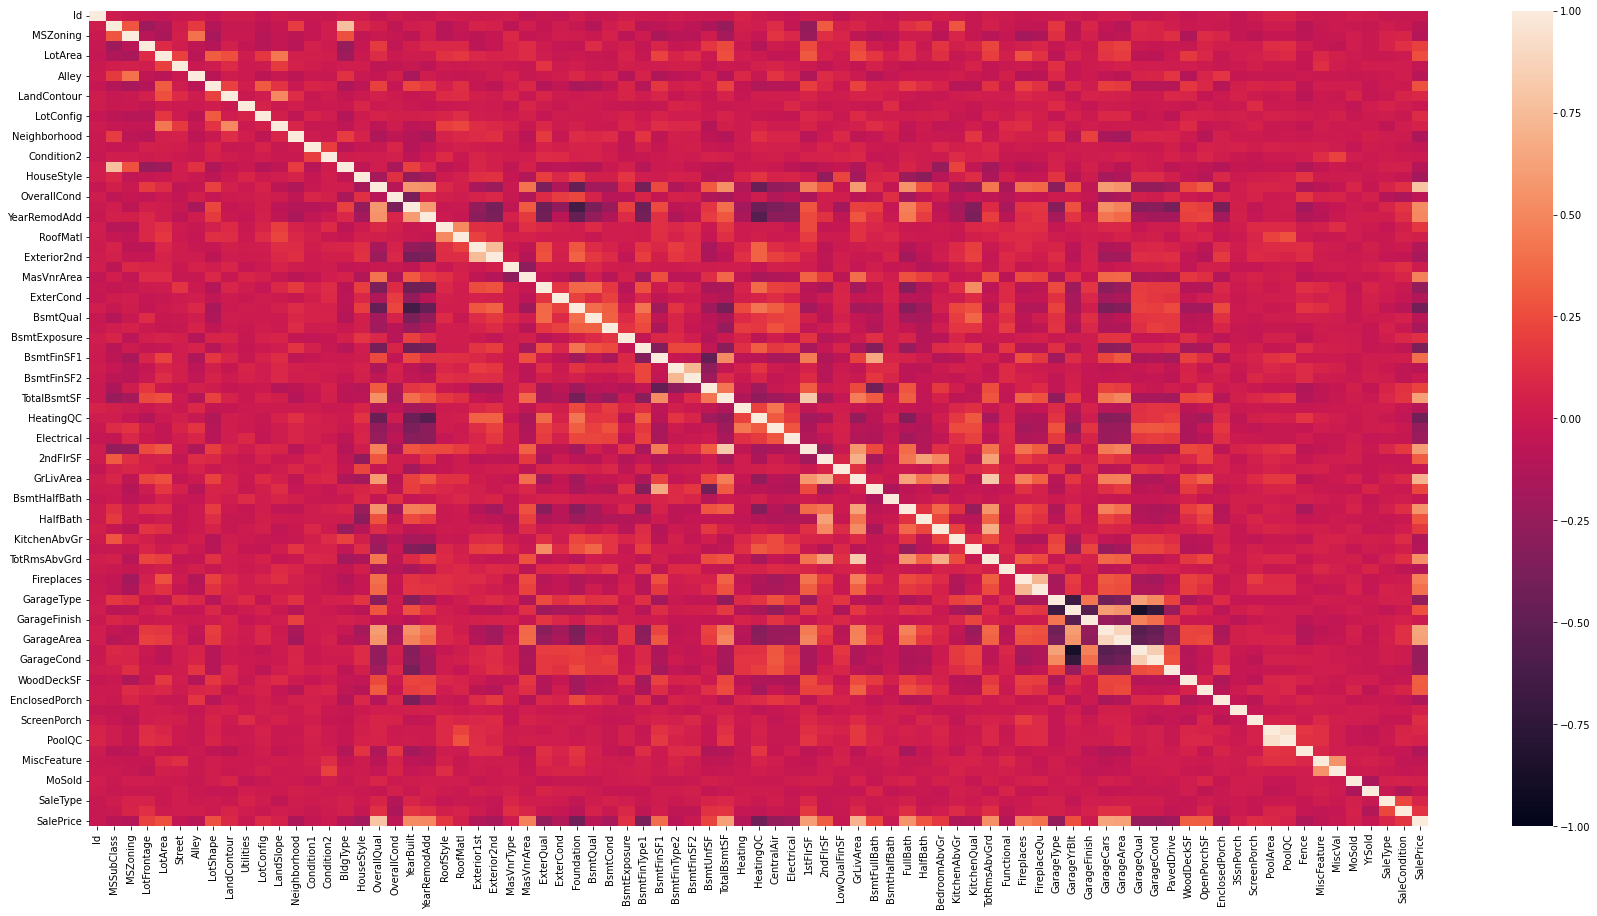

In [50]:
#Heat map using altair (correlation between these columns)

#sns.heatmap(clean_column.corr())
plt.figure(figsize=(30, 15))
heatmap = sns.heatmap(clean_column.corr(), vmin=-1, vmax=1)

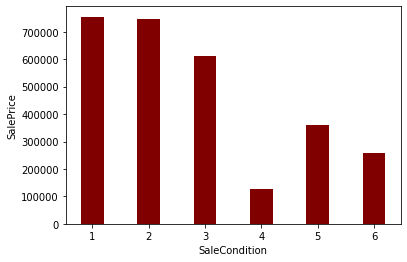

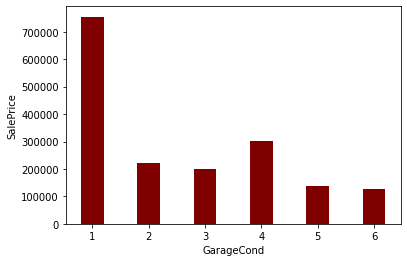

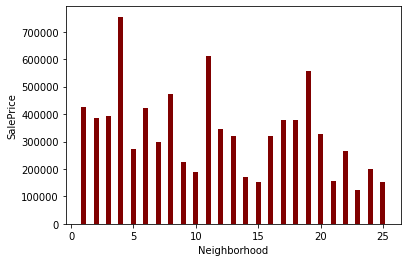

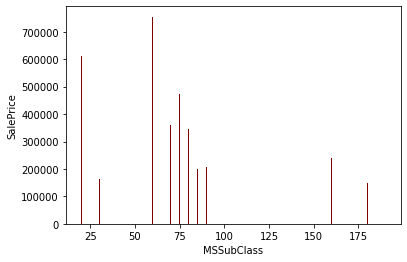

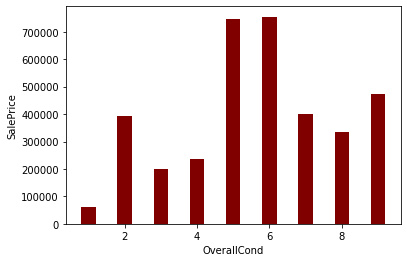

In [36]:
column=['SaleCondition', 'GarageCond','Neighborhood','MSSubClass','OverallCond']
for cols in column:
    plt.bar(clean_column[cols], clean_column['SalePrice'], color ='maroon',
        width = 0.4)
    plt.xlabel(cols)
    plt.ylabel('SalePrice')
    plt.show()